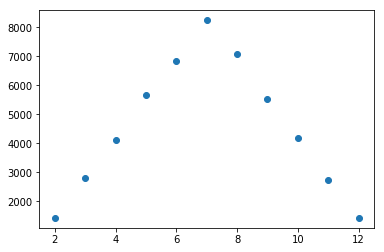

In [2]:
## 模拟掷骰子
import random
import pylab as mpl
from collections import Counter
import  matplotlib.pyplot as plt
lst=[]
i=0
while i <50000:  #进行50000次模拟
    a=random.choice(list(range(1,7)))
    b=random.choice(list(range(1,7)))
    s=a+b
    lst.append(s)
    i+=1
fre=dict(Counter(lst))
mpl.scatter(fre.keys(),fre.values())
plt.show()

#### 产生随机数
可以通过物理方法获得，当今普遍的是利用计算机用数学方法产生随机数，可以根据特定的迭代公式计算出来，但是可以被预测，所以称为伪随机数

In [8]:
# 计算pi
import random
def CalcPai(n):
    k = 0
    for i in range(0,n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            k = k +1
    print(format(4 * k / n, '.2f'))
if __name__ == '__main__':  
    #关于这句话的含义，可以看我记录下的pystudy中的md文件，表示如果被作为模块引用，那么下面将不被显示
    print('请输入n：')
    n = input()
    n = int(n)
    CalcPai(n)


请输入n：
3.14


In [46]:
from time import time,clock

#define
m = 2**32
a = 1103515245
c = 12345

def LCG(seed):
    seed = (a * seed + c) % m
    return seed/float(m-1)
def main():
    '''
    br = input("请输入随机数产生的范围(用,隔开):")
    mi = eval(br.split(',')[0])
    ma = eval(br.split(',')[1])
    '''
    ma=1
    mi=0
    seed = time()
    rd = LCG(seed)
    return(rd)
    '''
    ourd = int((ma-mi)*rd) + mi
    print("随机生成的数字式：{}".format(ourd))    
    '''

In [49]:
lst=[]
i=1
while i<100:
    main()
    lst.append(main())
    i+=1
from collections import Counter
Counter(lst)

Counter({0.43805468092627237: 99})

In [ ]:
from time import time,clock

In [63]:

a=1103515245
c=12345
m=2**32
def LCG(n):
    return ((a*n+c)%m)/float(m-1)
i=0
lst=[]
n=time()
while i<100:
    n=LCG(n)
    lst.append(n)
    i+=1
    if lst.count(lst[-1])!=1:
        break
print(len(lst[:-1]))

37
0.000997304916381836


In [64]:
#生成多个随机数
#Random - LCG Ver by xlxw
#import
from time import time,clock

#define
m = 2**32
a = 1103515245
c = 12345
rdls = []

def LCG(seed,mi,ma,n):
    if n == 1:
        return 0
    else:
        seed = (a * seed + c) % m
        rdls.append(int((ma-mi)*seed/float(m-1)) + mi)
        LCG(seed,mi,ma,n-1)
          
def main():
    br = input("请输入随机数产生的范围(用,隔开):")
    co = eval(input("请输入需要产生的随机数的个数:"))
    mi = eval(br.split(',')[0])
    ma = eval(br.split(',')[1])
    seed = time()
    LCG(seed,mi,ma,co)
    print("随机生成的数字",rdls)
    
main()

随机生成的数字 [3, 1, 3, 1, 3, 4, 4, 2, 1, 3, 4, 4, 2, 1, 2, 1, 2, 1, 1, 4, 4, 2, 4, 3, 3, 3, 2, 4, 1, 2, 1, 1, 1, 4, 2, 1, 3, 3, 4, 3, 3, 1, 1, 4, 3, 3, 3, 3, 4, 1, 3, 3, 2, 2, 1, 1, 2, 1, 1, 4, 1, 1, 2, 1, 4, 1, 3, 1, 3, 2, 4, 4, 3, 4, 1, 4, 4, 2, 1, 4, 1, 3, 4, 4, 4, 3, 2, 1, 3, 2, 4, 1, 3, 2, 2, 1, 2, 2, 3]


In [84]:
from time import time,clock
begin_time=time()


m = 2**32-1
a = 397204094
c = 0
def LCG(seed):
    seed = (a * seed + c) % m
    return seed
seed=0
i=0
lst=[]
n=time()
while i<1000000:
    n=LCG(n)
    lst.append(n)
    i+=1
    if lst.count(lst[-1])!=1:
        break
print(len(lst[:-1]))
end_time=time()
run_time=end_time-begin_time
print('运行时间：',run_time)

136141
运行时间： 155.54384088516235


In [2]:
from time import time,clock
m = 2**32-1
a = 397204094
c = 0
def LCG(seed=time()):
    seed = (a * seed + c) % m
    return float(format(seed/m,'.4f'))
LCG()

0.0159

In [ ]:
'''
seed( ) 用于指定随机数生成时所用算法开始的整数值。 

　　1.如果使用相同的seed( )值，则每次生成的随即数都相同； 

　　2.如果不设置这个值，则系统根据时间来自己选择这个值，此时每次生成的随机数因时间差异而不同。 

　　3.设置的seed()值仅一次有效

所谓随机数其实是伪随机数，所谓的‘伪’，意思是这些数其实是有规律的，只不过因为算法规律太复杂，很难看出来。再厉害的算法，没有一个初始值，它也不可能凭空造出一系列随机数来，我们说的种子就是这个初始值。

random随机数是这样生成的：我们将这套复杂的算法（是叫随机数生成器吧）看成一个黑盒，把我们准备好的种子扔进去，它会返给你两个东西，一个是你想要的随机数，另一个是保证能生成下一个随机数的新的种子，把新的种子放进黑盒，又得到一个新的随机数和一个新的种子，从此在生成随机数的路上越走越远。
'''

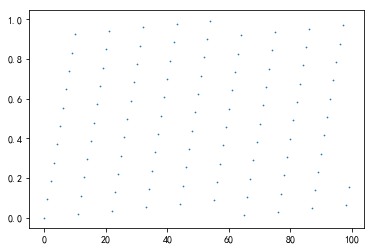

In [5]:
lst=[]
i=0
while i<100:
    def LCG(seed=time()):
        seed = (a * seed + c) % m
        return float(format(seed/m,'.4f'))
    lst.append(LCG(i))
    i+=1
from collections import Counter
fre=Counter(lst)
import pylab as mpl 
mpl.scatter(list(range(len(dict(fre).keys()))),dict(fre).keys(),s=0.5) 

In [ ]:
'''
python中标准分布随机数的生成
numpy.random.beta(a, b [, size])                  Beta分布随机变量

numpy.random.binomial(n, p[, size])            二项分布随机变量

numpy.random.chisquare(df[, size])            卡方分布随机变量

numpy.random.dirichlet(alpha[, size])           狄利克雷分布随机变量

numpy.random.exponential([scale, size])     指数分布随机变量

numpy.random.geometric(p[, size])               几何分布随机变量

numpy.random.normal([loc, scale, size])        正态分布随机变量

numpy.random.poisson([lam, size])                泊松分布随机变量

numpy.random.uniform([low, high, size])        均匀分布随机变量

numpy.random.wald(mean, scale[, size])        Wald分布随机变量
'''

In [16]:
'''
### np.histogram()是一个生成直方图的函数
histogram(a,bins=10,range=None,weights=None,density=False);

a是待统计数据的数组；

bins指定统计的区间个数；

range是一个长度为2的元组，表示统计范围的最小值和最大值，默认值None，表示范围由数据的范围决定

weights为数组的每个元素指定了权值,histogram()会对区间中数组所对应的权值进行求和

density为True时，返回每个区间的概率密度；为False，返回每个区间中元素的个数

-------------------------------------------------------------------------------------------------------------
### numpy.diff(a, n, axis)
沿着指定轴计算第N维的离散差值

参数：
a：输入矩阵
n：可选，代表要执行几次差值，默认是1次
axis：默认是最后一个
'''

[4.6401814]


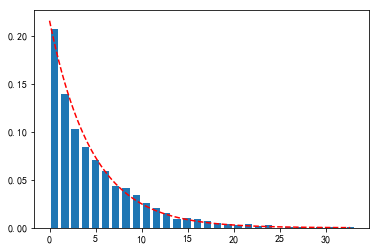

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.random.exponential(5, size=1000)

hist,edges = np.histogram(data,bins="auto",density=True )  #返回每个区间的概率密度

x = edges[:-1]+np.diff(edges)/2.
plt.bar(x,hist)

func = lambda x,beta: 1./beta*np.exp(-x/beta)

popt, pcov = curve_fit(f=func, xdata=x, ydata=hist) 

print(popt)

xx = np.linspace(0, x.max(), 101)
plt.plot(xx, func(xx,*popt), ls="--", color="r")

plt.show()

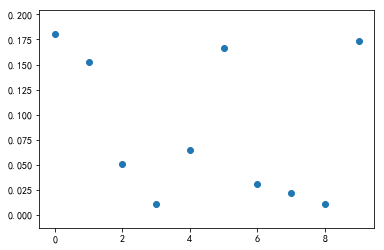

In [21]:
import pylab as mpl
from scipy.optimize import curve_fit
import random
import numpy as np
import pandas as pd

testx = pd.DataFrame(list(range(10))).astype(float)
testx = testx[0]

data=[]
for i in range(1,11):
   x = random.expovariate(15) # rate = 15 arrivals per second
   data.append(x)

testy = pd.DataFrame(data).T.astype(float)
testy=np.array(testy)

scatter(testx, testy[0])

[0.12408895 0.01075053]
[[ 0.00477972 -0.00164627]
 [-0.00164627  0.00109198]]


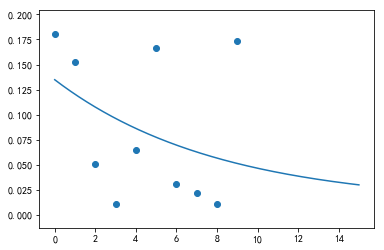

In [33]:
def func(x, a, e):
    return a*np.exp(-a*x)+e

popt, pcov = curve_fit(f=func, xdata=testx, ydata=testy[0]) 

print(popt) # parameters
print(pcov) # covariance

scatter(testx, testy[0])

xx = np.linspace(0, 15, 1000)
plot(xx, func(xx,*popt))

plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


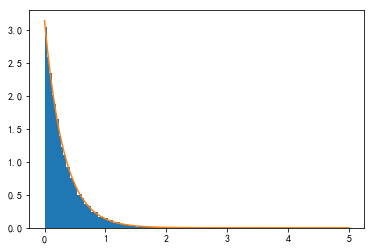

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from random import random


def gen( a ):
    y=random()
    return( -np.log( y ) / a )

def dist_func( x, a ):
    return( a * np.exp( -a * x) )

data = [ gen(3.14) for x in range(20000) ]
fig = plt.figure()
ax = fig.add_subplot( 1, 1, 1 )
ax.hist(data, bins=80, normed=True)#, histtype="step") 
ax.plot(np.linspace(0,5,150), dist_func( np.linspace(0,5,150), 3.14 ) )
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([2.92429084e+00, 2.66579732e+00, 2.27076619e+00, 2.04011043e+00,
        1.87838628e+00, 1.67689389e+00, 1.48335515e+00, 1.40116746e+00,
        1.21293115e+00, 1.03529970e+00, 8.57668257e-01, 7.99341513e-01,
        6.90641672e-01, 6.28338105e-01, 5.67360145e-01, 5.15661441e-01,
        3.89728698e-01, 3.76472620e-01, 3.76472620e-01, 3.06215406e-01,
        2.51865485e-01, 2.35958191e-01, 2.33306976e-01, 2.08120427e-01,
        1.36537605e-01, 1.65700977e-01, 1.41840036e-01, 1.15327880e-01,
        9.67693706e-02, 8.21876846e-02, 8.35132924e-02, 7.95364690e-02,
        6.49547830e-02, 6.23035674e-02, 5.70011361e-02, 4.10938423e-02,
        4.50706658e-02, 4.37450579e-02, 2.38609407e-02, 2.91633720e-02,
        2.65121563e-02, 1.32560782e-02, 1.85585094e-02, 1.72329016e-02,
        1.45816860e-02, 1.72329016e-02, 1.59072938e-02, 1.06048625e-02,
        7.95364690e-03, 3.97682345e-03, 1.19304703e-02, 2.65121563e-03,
        6.62803908e-03, 7.95364690e-03, 5.30243127e-03, 3.976823

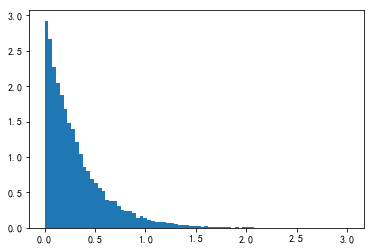

In [39]:
hist(data, bins=80, normed=True) 